In [ ]:
import numpy as np
import pandas as pd 
df =pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [ ]:
df.head()

In [ ]:
# first we fix the inconsistance in the column names
df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

index in the prev series is basically the column name 

In [8]:
#now we will do the same to all the columns that are of type object (string)
str_columns= list(df.dtypes[df.dtypes == 'object'].index)
str_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [12]:
for col in str_columns: 
    df[col] = df[col].str.lower().str.replace(' ' ,'_' )

In [13]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


### now the data is more cleaner ^-^

# Exploratory Data Analysis

In [18]:
for col in df.columns: 
  print(col)
  print(df[col].unique()[:5]) # show first 5 unique values
  print(df[col].nunique())   # show number of all unique values in the dataset in each col
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Distrebution of prices 

In [29]:
import seaborn as sns

In [30]:
import matplotlib.pyplot as plt

<Axes: xlabel='msrp', ylabel='Count'>

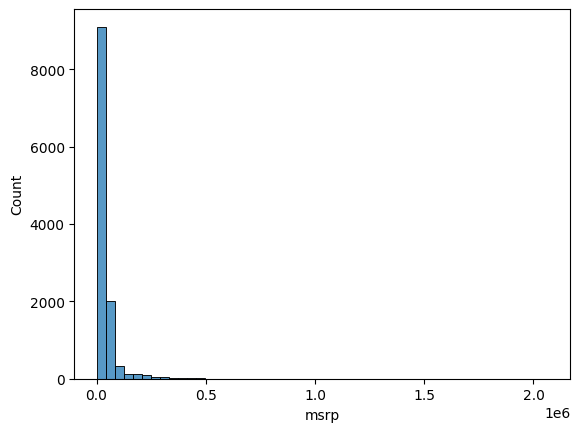

In [36]:
sns.histplot(df.msrp, bins= 50) #this inn't so clear cuz it has a tail distrebution so we zoom in a bit 

<Axes: xlabel='msrp', ylabel='Count'>

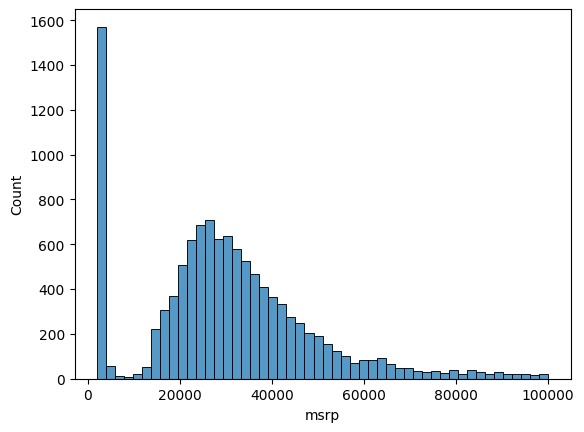

In [38]:
sns.histplot(df.msrp[df.msrp < 100000], bins= 50)

### this tail distrebution is not good and is gonna confuse our model so we meed to get rid of it using logaritmic distro

In [42]:
prices_log = np.log1p(df.msrp) #log1p is just log put adding 1 each value so if there is any 0s it woun't break the log
prices_log

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

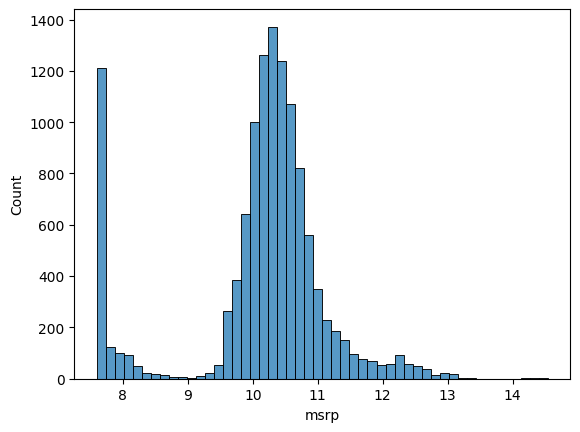

In [45]:
sns.histplot(prices_log, bins= 50) # now it look like a normal distrebution so it's ideal for models

# dealing with missing values 

In [47]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [49]:
df.isnull().mean() *100

make                  0.000000
model                 0.000000
year                  0.000000
engine_fuel_type      0.025180
engine_hp             0.579151
engine_cylinders      0.251805
transmission_type     0.000000
driven_wheels         0.000000
number_of_doors       0.050361
market_category      31.408427
vehicle_size          0.000000
vehicle_style         0.000000
highway_mpg           0.000000
city_mpg              0.000000
popularity            0.000000
msrp                  0.000000
dtype: float64

according to the % of missing values it's ok to drop  rows of  
engine_fuel_type ,engine_hp ,engine_cylinders  
or we can just fill them 

In [1]:
df_clean =df.dropna(columns = ['engine_fuel_type','engine_hp', 'engine_cylinders', 'number_of_doors'])
df_clean.isnull().sum()

NameError: name 'df' is not defined